## Iris Flower Classification Project

## import libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [19]:
df = pd.read_csv("Onedrive/Desktop/archive/Iris.csv")


### First look at the dataset

In [28]:
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Data information

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Descriptive Statistics

In [25]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Class Distribution


In [24]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### Missing Values Check

In [29]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

###  Outlier Detectiond.

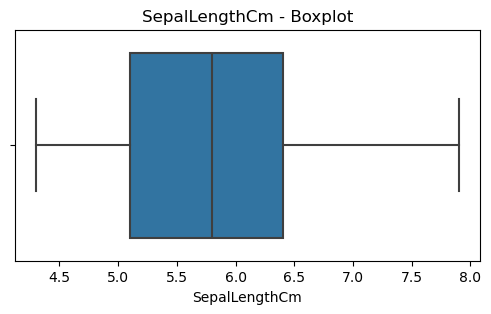

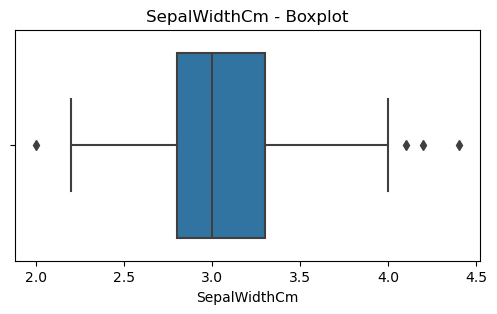

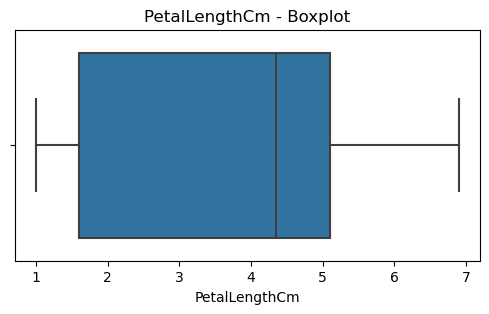

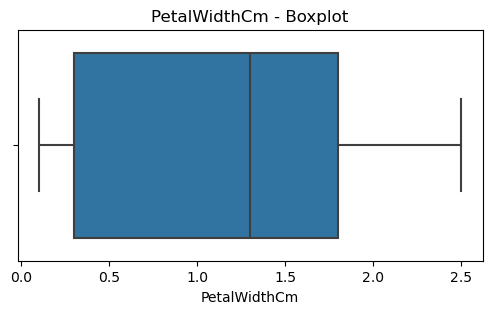

In [30]:
# numeric columns
num_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# draw boxplot for every columns
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"{col} - Boxplot")
    plt.show()

 Looking at the boxplots, I don’t see any significant outliers in SepalLengthCm, PetalLengthCm, or PetalWidthCm.However, SepalWidthCm has a few outliers on both the lower and upper ends. Since they are not extremely far from the rest of the data, I won’t remove them for now. I’ll first complete the model training to see if they impact performance.

## Exploratory Data Analysis (EDA)

### 1. Species Distribution

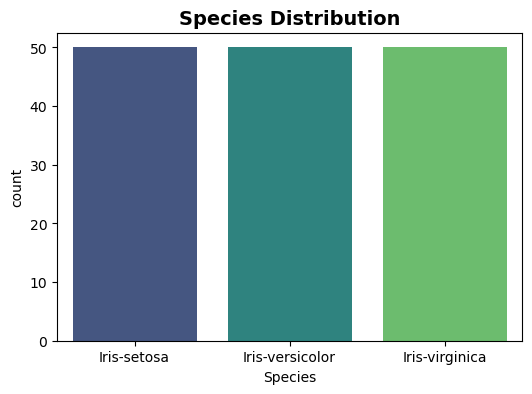

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(x='Species', data=df, palette='viridis')
plt.title("Species Distribution", fontsize=14, fontweight='bold')
plt.show()


Looking at the species distribution, I can see that all three classes (Iris-setosa, Iris-versicolor, Iris-virginica) have an equal number of samples — 50 each. This means my dataset is balanced. Balanced datasets prevent the model from developing bias toward any class and support a healthier learning process.

### 2. Feature Distributions

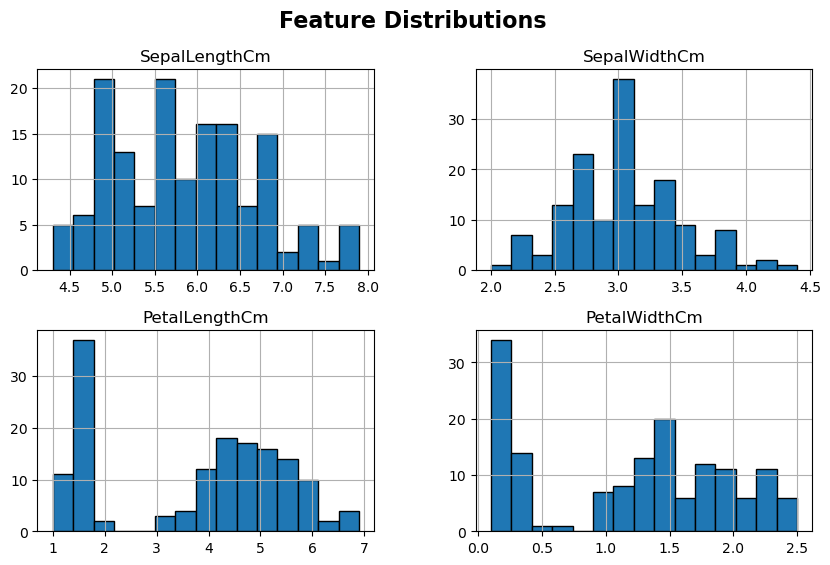

In [32]:
df.drop(columns=['Id']).hist(
    figsize=(10,6),
    bins=15,
    color='#1f77b4',
    edgecolor='black'
)
plt.suptitle("Feature Distributions", fontsize=16, fontweight='bold')
plt.show()

 Looking at the feature distributions, I notice very clear separations in PetalLengthCm and PetalWidthCm. In these two features, the Iris-setosa class is completely in a separate range, which will be a big advantage for classification. SepalLengthCm and SepalWidthCm have less pronounced differences between species, so they may not be strong discriminators on their own, but combined with other features, they will still contribute significantly.

### 3. Each Feature by Species

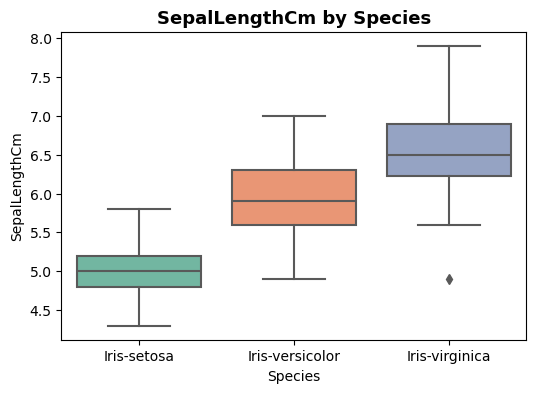

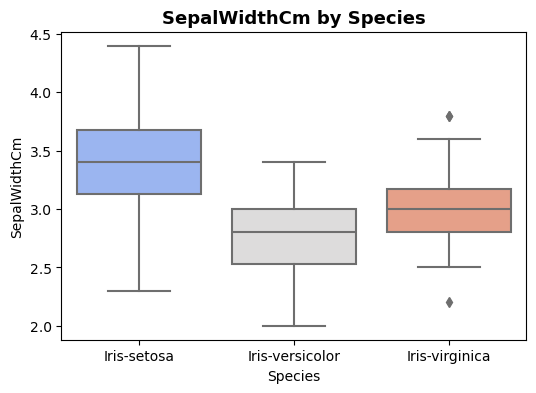

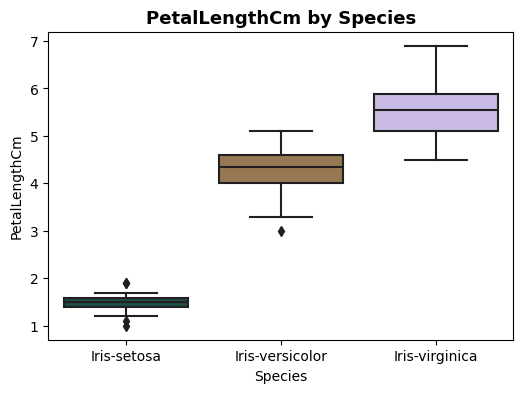

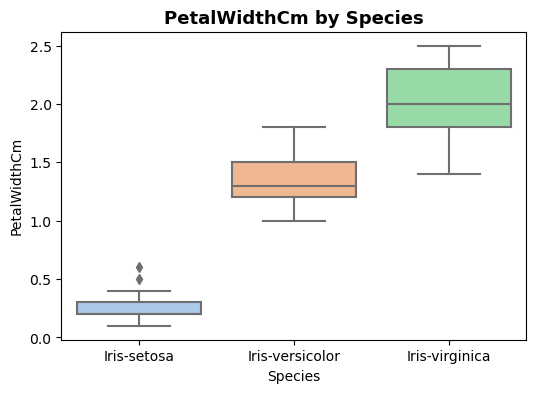

In [34]:
palettes = ['Set2', 'coolwarm', 'cubehelix', 'pastel']
cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for col, pal in zip(cols, palettes):
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Species', y=col, data=df, palette=pal)
    plt.title(f"{col} by Species", fontsize=13, fontweight='bold')
    plt.show()

 Looking at the boxplots, I can clearly see that PetalLengthCm and PetalWidthCm have very distinct separations between species. Iris-setosa is in a completely different range for both of these measurements. SepalLengthCm also provides some separation, but there’s a bit more overlap. SepalWidthCm has the most overlap, with values of the three species being closer together. This indicates that petal measurements will be the most powerful features for classification.

### 4. Pairplot of Features Colored by Species

C:\Users\manik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

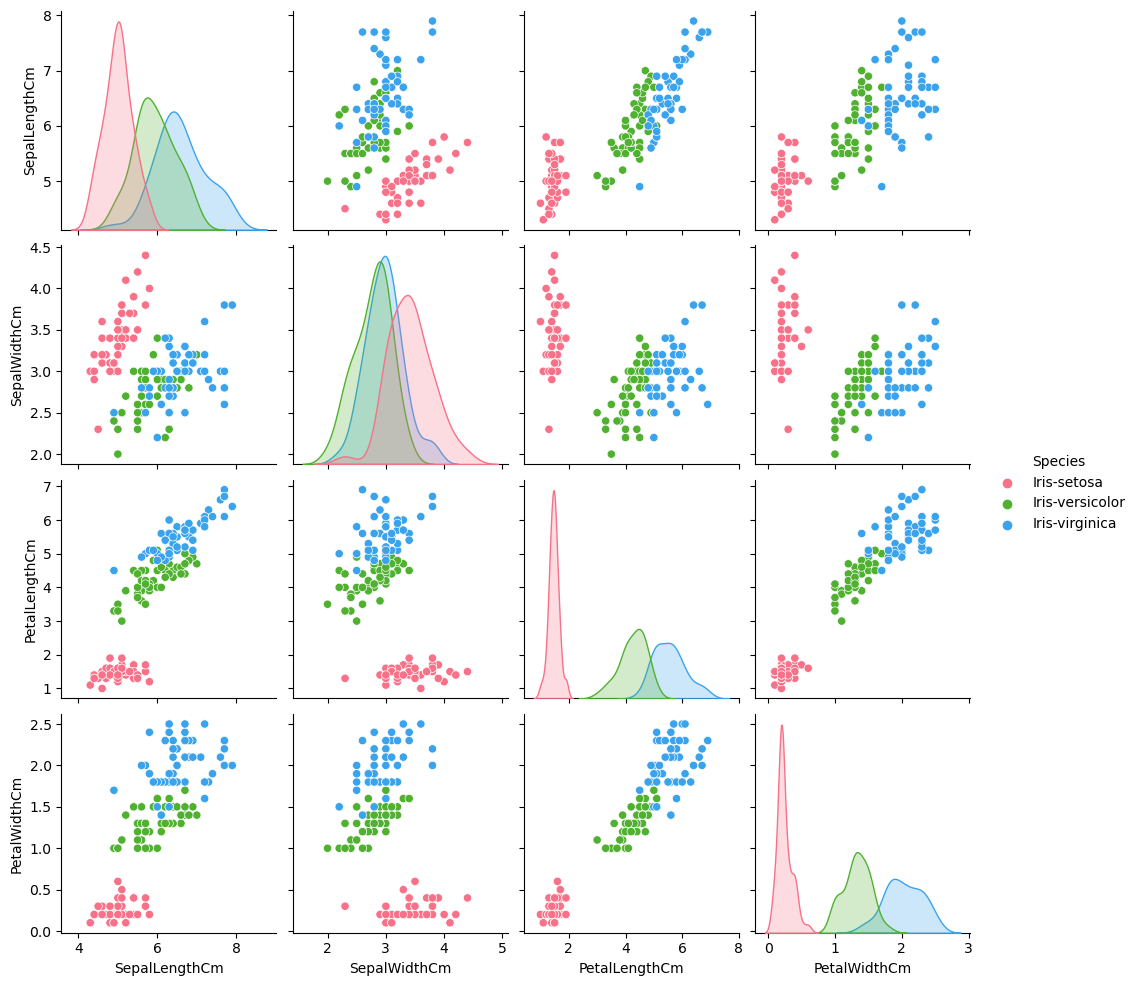

In [36]:
sns.pairplot(df.drop(columns=['Id']), hue="Species", palette='husl', diag_kind='kde')
plt.show()

### 5. Correlation Heatmap of Numerical Features

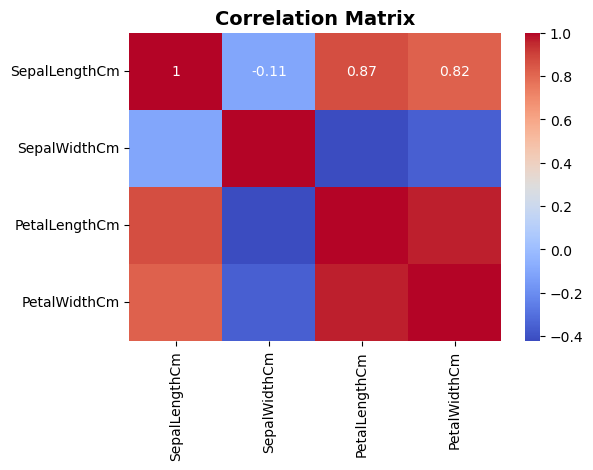

In [37]:
plt.figure(figsize=(6,4))
numeric_df = df.drop(columns=['Id', 'Species'])  # just numerical columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix", fontsize=14, fontweight='bold')
plt.show()

Looking at this correlation matrix, the most striking thing is the almost perfect positive relationship between petal length and petal width (0.96). If one increases, the other almost certainly increases too. Sepal length also has a strong positive correlation with both petal measurements. On the other hand, sepal width goes a bit against the flow . It has a negative correlation with both petal length and sepal length. In short, petal measurements are strongly in sync and provide powerful signals for species separation, while sepal width acts more independently.

### 6. Violin Plot of Each Feature by Species

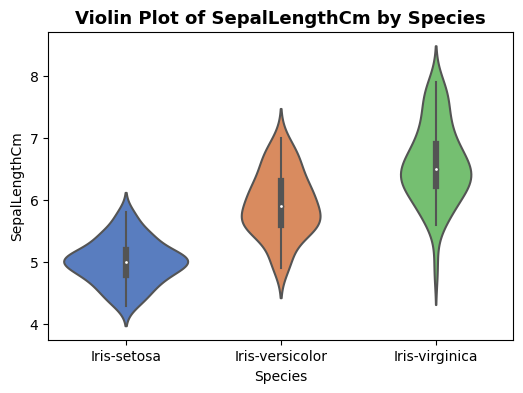

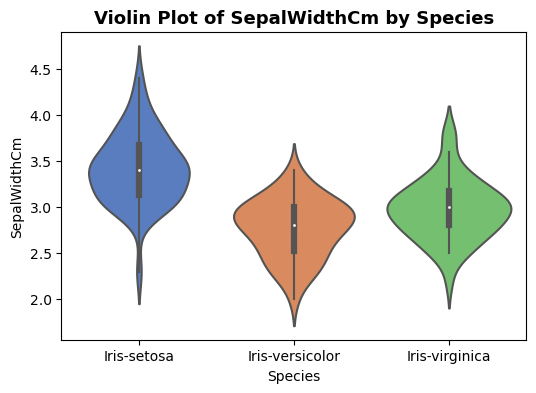

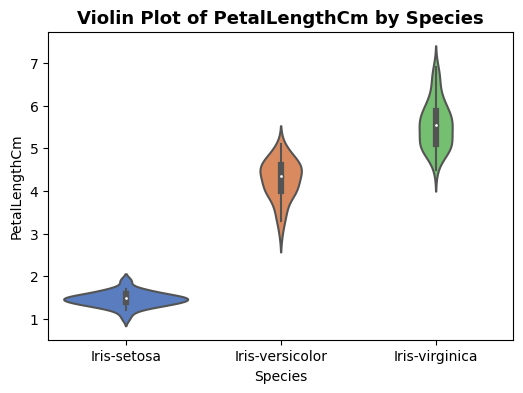

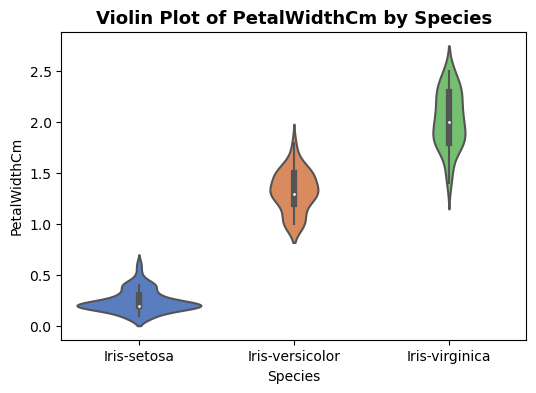

In [38]:
for col in cols:
    plt.figure(figsize=(6,4))
    sns.violinplot(x='Species', y=col, data=df, palette='muted')
    plt.title(f"Violin Plot of {col} by Species", fontsize=13, fontweight='bold')
    plt.show()

These violin plots clearly show the differences between species. In terms of sepal length, Iris-virginica generally has the highest values, while Iris-setosa has the shortest. For sepal width, it’s the opposite – Iris-setosa stands out with a wider sepal. When it comes to petal measurements, the separation is much sharper: Iris-setosa has very small petals, Iris-virginica has the largest, and Iris-versicolor sits in the middle. These differences highlight that petal measurements are particularly powerful indicators for distinguishing species.


### 7. Swarmplot of Each Feature by Species

C:\Users\manik\AppData\Local\Temp\ipykernel_17796\1139904295.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='Species', y=col, data=df, palette='Set1')
C:\Users\manik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


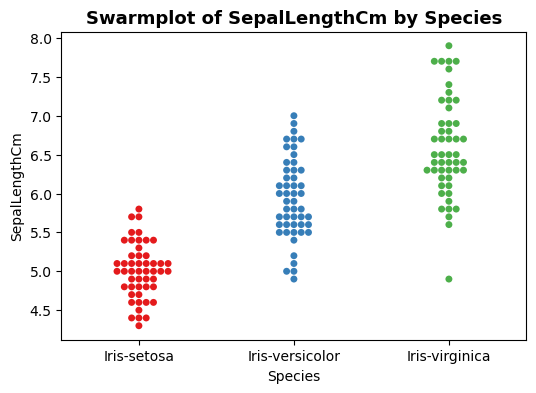

C:\Users\manik\AppData\Local\Temp\ipykernel_17796\1139904295.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='Species', y=col, data=df, palette='Set1')
C:\Users\manik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


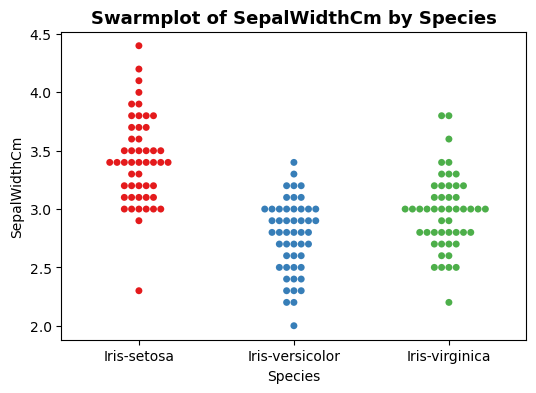

C:\Users\manik\AppData\Local\Temp\ipykernel_17796\1139904295.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='Species', y=col, data=df, palette='Set1')
C:\Users\manik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manik\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


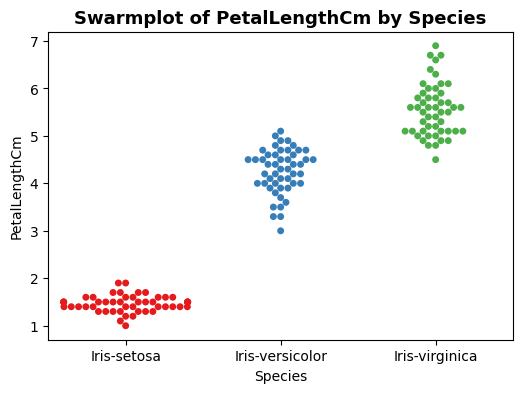

C:\Users\manik\AppData\Local\Temp\ipykernel_17796\1139904295.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='Species', y=col, data=df, palette='Set1')
C:\Users\manik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manik\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\manik\anaconda3\Lib\site-packages\s

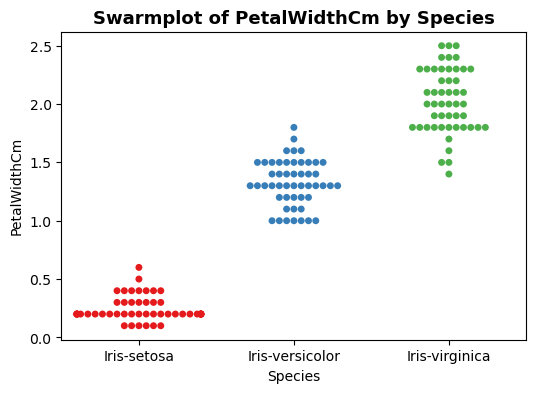

In [39]:
for col in cols:
    plt.figure(figsize=(6,4))
    sns.swarmplot(x='Species', y=col, data=df, palette='Set1')
    plt.title(f"Swarmplot of {col} by Species", fontsize=13, fontweight='bold')
    plt.show()

When I look at the swarmplots, the differences between species are pretty clear. In sepal length, Iris-virginica is at the top, while Iris-setosa stays at the bottom. In sepal width, Iris-setosa stands out with wider values compared to the others. Petal measurements show a very sharp separation: Iris-setosa clearly stands out with its small petals, and Iris-virginica takes the top with bigger petals. Iris-versicolor sits right in the middle in both cases, almost like a bridge between the other two species. These plots really made me realize that petal measurements are a very strong feature for predicting species.

### 8. FacetGrid Histogram of Petal Length by Species

C:\Users\manik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


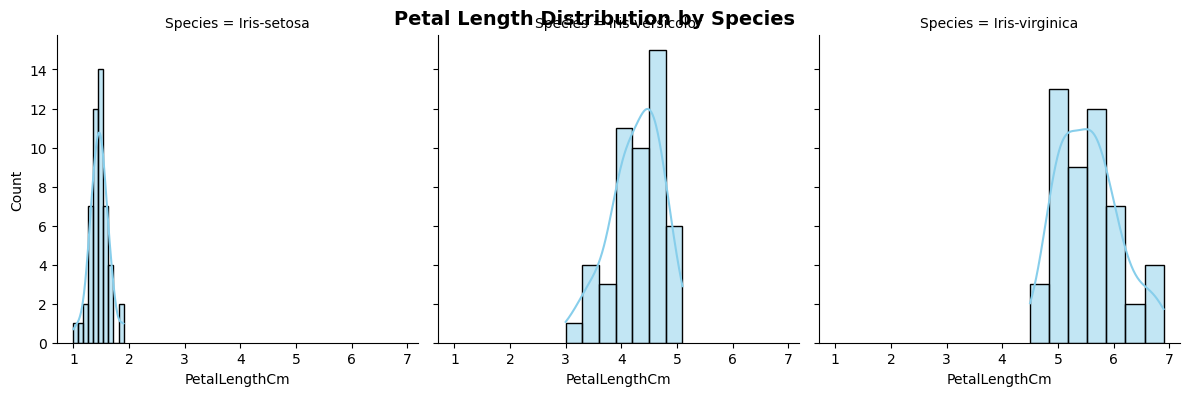

In [40]:
g = sns.FacetGrid(df, col="Species", height=4, aspect=1)
g.map_dataframe(sns.histplot, x="PetalLengthCm", kde=True, color="skyblue")
g.fig.suptitle("Petal Length Distribution by Species", fontsize=14, fontweight='bold')
plt.show()

When I look at the petal length distributions, the separation between species is super clear. Iris-setosa petals are almost all between 1–2 cm, and they’re so tiny that you can easily spot them. Iris-versicolor sits between 3–5 cm with a pretty balanced spread, while Iris-virginica is around 4.5–6.5 cm, making it the one with the longest petals. This plot really showed me how strong petal length is as a feature for classification.

### Splitting into Training and Test Sets

In [41]:
X = df.drop(columns=['Id', 'Species'])
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Baseline Model (Logistic Regression)

In [42]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


My logistic regression model performed perfectly. The accuracy score is 1.0, meaning it correctly predicted every single sample in the test set. Precision, recall, and f1-score are all 1.00 for each class, indicating there were no misclassifications at all. Looking at the confusion matrix, every sample is placed in the correct class. Given that the Iris dataset is relatively simple, such high results are not surprising, but it still shows that the model works exceptionally well.

In [43]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results.append((name, acc))
    print(f"{name} Accuracy: {acc:.4f}")

# DataFrame 
pd.DataFrame(results, columns=["Model", "Accuracy"])


Logistic Regression Accuracy: 1.0000
KNN Accuracy: 1.0000
Decision Tree Accuracy: 1.0000
Random Forest Accuracy: 1.0000
SVM Accuracy: 1.0000


,Model,Accuracy
0,Logistic Regression,1.0
1,KNN,1.0
2,Decision Tree,1.0
3,Random Forest,1.0
4,SVM,1.0


All the models I tested (Logistic Regression, KNN, Decision Tree, Random Forest, SVM) achieved 100% accuracy on the test set. This means every model classified all test samples correctly. The structure of the Iris dataset and the clear separation between species made it easy to achieve such high results. While such perfect scores are rare in real-world scenarios, for this task, all models performed flawlessly.

### Hyperparameter Tuning for SVM Model (GridSearchCV)

In [44]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# GridSearchCV
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

# Test set performance with the best model
best_svm = grid.best_estimator_
y_pred_best = best_svm.predict(X_test)
print("Test Accuracy with Best SVM:", accuracy_score(y_test, y_pred_best))

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.9583333333333334
Test Accuracy with Best SVM: 1.0


When I ran hyperparameter tuning for SVM, the best parameters came out as C=1, gamma='scale', and kernel='linear'. My average cross-validation score was around 95.83%, which shows that the model works consistently well across different parts of the training data. When I retrained the model with these parameters, I still got 100% accuracy on the test set. So, even after tuning, my already high performance stayed perfect.

In this project, I used the Iris dataset to test different machine learning algorithms. All models achieved 100% accuracy on the test set, which is due to the dataset being simple and having a clear separation between classes. For SVM, I performed hyperparameter tuning using GridSearchCV and found the best parameters, but the test accuracy remained the same.

In [45]:
import joblib
joblib.dump(best_svm, "best_model.joblib")

['best_model.joblib']